In [270]:
import pandas as pd
import numpy as np
from pyairtable import Table
from itertools import chain
import glob
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import rgb2hex
from generativepy.color import Color
from PIL import ImageColor
import geopandas as gpd
import datetime as dt
import matplotlib
import matplotlib.patches as mpatches
from matplotlib import font_manager
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import ListedColormap
import matplotlib.dates as md
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import geopandas
import pycountry
import time
import string
import warnings
warnings.filterwarnings('ignore')

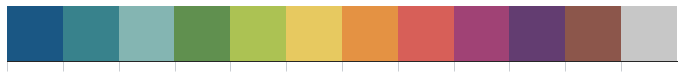

In [271]:
colors = ['#1A5784', '#38828C', '#84B5B2', '#60904F', '#ACC253', '#E7C960', '#E49243', '#D75F58', '#A04275', '#633D71', '#8c564b', '#c7c7c7']
sns.palplot(sns.color_palette(colors))



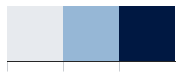

In [272]:
# Define gradient color
# gradient = ['#84B5B2', '#1A5784']
gradient = ['#E7EAEE','#96B7D6', '#001842']
cm = LinearSegmentedColormap.from_list(
        "Custom", gradient, N=100)
sns.palplot(sns.color_palette(gradient))

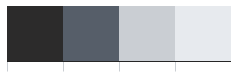

In [273]:
# Define chart color palette
chart = ['#2C2B2B','#565E69','#CACED3','#E7EAEE']
sns.palplot(sns.color_palette(chart))

In [274]:
# Define constants
figure_size = (20,6)

# # Define x-axis range
# left = dt.date(2005, 1, 1)
# right = dt.date(2023, 9, 1)

# Set background
sns.set_context('talk') #change the size from small to medium
sns.set_style('white') #change bg to white

# Add every font at the specified location
font_dir = ['/Users/haileyrobertson/Library/Fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
# Set font family globally
plt.rcParams['font.family'] = 'Open Sans'
plt.rcParams['font.weight'] = 'bold'

# Set margins
plt.rcParams['axes.xmargin'] = 0.9

# Define list of date formats
zfmts = ['', '%Y','%b\n%Y', '%b', '%b-%d', '%H:%M', '%H:%M']

# Format axes 
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.titlepad'] = 30

# Format ticks
plt.rcParams["xtick.direction"] = "out"
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.color'] = chart[2]
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['xtick.labelcolor'] = chart[1]
plt.rcParams['xtick.labelsize'] = 14

plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.pad"] = -35
plt.rcParams["ytick.minor.pad"] = -35
plt.rcParams["ytick.major.size"] = 10
plt.rcParams["ytick.minor.size"] = 10
plt.rcParams["ytick.color"] = chart[2]
plt.rcParams["ytick.major.width"] = 1
plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["ytick.labelcolor"] = chart[1]
plt.rcParams["ytick.labelsize"] = 14


# Adjust fontdict for title
titlefont = {'family': 'Open Sans',
             'color':  chart[0], 
             'weight': 400,
             'size': 20}

# Set grid style
plt.rcParams['grid.color'] = chart[2]
plt.rcParams['grid.linestyle'] = 'dashed'
plt.rcParams['grid.linewidth']=0.7

# Set legend style
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125



# Set axis labels
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelcolor'] = chart[1]

In [341]:
# Function to remove the first and last characters from a string
def remove_chars(s):
    return s[1:-1]

In [342]:
master = pd.read_csv('data/h5n1_cases_country_species_class_month.csv')
country_match = pd.read_csv('data/country_match.csv')

master = pd.merge(master, country_match, left_on="country",right_on="iso2", how = "inner")
master = master.drop(['name','iso2','country'], axis=1)

master['yearMonth'] = master['yearMonth'].apply(remove_chars)
master['species'] = master['species'].apply(remove_chars)
master['class'] = master['class'].apply(remove_chars)
master['iso3'] = master['iso3'].apply(remove_chars)

master['yearMonth'] = pd.to_datetime(master['yearMonth'], format="%Y-%m")
master = master.sort_values(by=["yearMonth","iso3"])

In [343]:

# Filter the DataFrame to only include rows where class is "mammalia"
mammalia_df = master[master['class'] == 'Mammalia']

# Group by species and calculate the sum of monthlyCases for each species
grouped_df = mammalia_df.groupby('species')['monthlyCases'].sum().reset_index()

# Sort the species by their totalCases in descending order
sorted_df = grouped_df.sort_values(by='monthlyCases', ascending=False)

# Retrieve the top 10 species with the highest total cases
top_10_species = sorted_df.head(10)

print(top_10_species)


                   species  monthlyCases
19           Vulpes vulpes           157
10       Mephitis mephitis           114
16          Phoca vitulina            27
17                    Puma            19
0               Bos taurus            14
7               Lynx rufus             6
4              Felis catus             6
2   Canis lupus familiaris             5
3     Didelphis virginiana             3
15        Pekania pennanti             3


In [344]:
# List of species names to filter
species_list = ['Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Lynx rufus', 'Mephitis mephitis', 'Pekania pennanti', 'Phoca vitulina', 'Puma', 'Vulpes vulpes', 'Didelphis virginiana']


# Filter the DataFrame to only include rows with the specified species names
filtered_df = master[master['species'].isin(species_list)]

In [345]:

# Pivot the DataFrame with species as columns
pivot_df = filtered_df.pivot_table(index='yearMonth', columns='species', values='monthlyCases', aggfunc = 'sum',fill_value=0)

# Flatten the DataFrame
pivot_df.reset_index(inplace=True)

# Set 'yearMonth' as the index again
pivot_df.set_index('yearMonth', inplace=True)

# Resample the DataFrame and forward fill missing months
pivot_df = pivot_df.asfreq('MS',fill_value=0).reset_index()

In [346]:
pivot_df['total'] = pivot_df[species_list].sum(axis=1)

for column in species_list:
    pivot_df[column] = (pivot_df[column] / pivot_df['total']) * 100
    pivot_df[column] = pivot_df[column].fillna(0)  # Fill NaN with 0

In [347]:
pivot_df.head()

species,yearMonth,Bos taurus,Canis lupus familiaris,Didelphis virginiana,Felis catus,Lynx rufus,Mephitis mephitis,Pekania pennanti,Phoca vitulina,Puma,Vulpes vulpes,total
0,2008-01-01,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2008-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2008-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2008-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2008-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


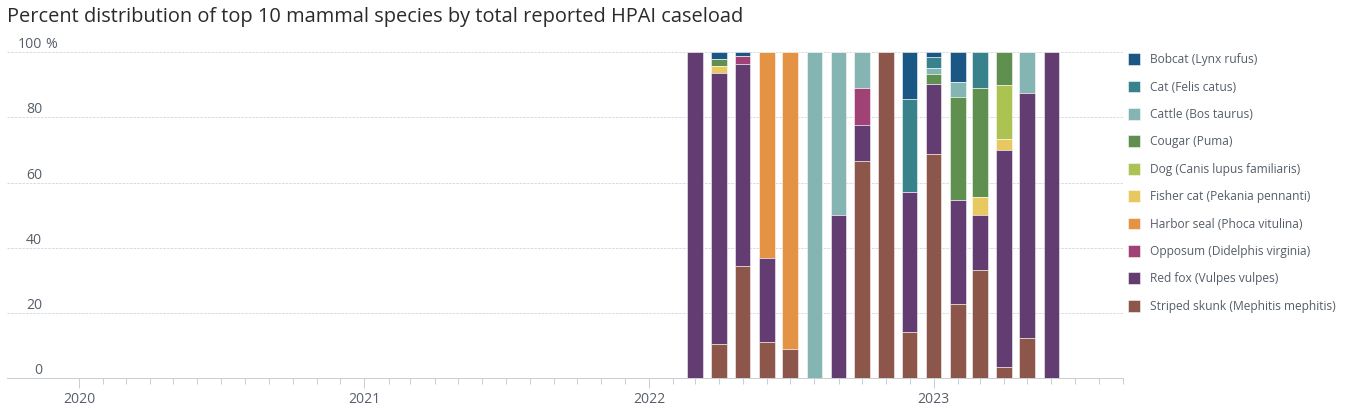

In [348]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=pivot_df['yearMonth']
y1=pivot_df['Lynx rufus']
y2=pivot_df['Felis catus']
y3=pivot_df['Bos taurus']
y4=pivot_df['Puma']
y5=pivot_df['Canis lupus familiaris']
y6=pivot_df['Pekania pennanti']
y7=pivot_df['Phoca vitulina']
y8= pivot_df['Didelphis virginiana']
y9 = pivot_df['Vulpes vulpes']
y10 =pivot_df['Mephitis mephitis']

# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y1, bottom=y2+y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[0], label='Bobcat (Lynx rufus)') 
plt.bar(x, y2, bottom=y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[1], label='Cat (Felis catus)')
plt.bar(x, y3, bottom=y4+y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[2], label='Cattle (Bos taurus)')
plt.bar(x, y4, bottom=y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[3], label='Cougar (Puma)')
plt.bar(x, y5, bottom=y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[4], label='Dog (Canis lupus familiaris)')
plt.bar(x, y6, bottom=y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[5], label='Fisher cat (Pekania pennanti)')
plt.bar(x, y7, bottom=y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[6], label='Harbor seal (Phoca vitulina)')
plt.bar(x, y8, bottom=y9+y10, linewidth=0.5,width=20, align="center", color=colors[8], label='Opposum (Didelphis virginia)')
plt.bar(x, y9, bottom=y10, linewidth=0.5, width=20, align="center", color=colors[9], label='Red fox (Vulpes vulpes)')
plt.bar(x, y10, bottom=0, linewidth=0.5, width=20, align="center", color=colors[10], label='Striped skunk (Mephitis mephitis)')


ax.xaxis_date()

# Define x-axis range
left = dt.date(2019, 10, 1)
right = dt.date(2023, 9, 1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,100)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "Percent distribution of top 10 mammal species by total reported HPAI caseload"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("%", rotation=0,loc='top',labelpad=-50,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")
    
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.20,1.03),labelcolor=chart[1],labelspacing=1.2)


plt.tight_layout()
plt.show()
# plt.savefig('figures/hpai_mammal_percent_2020.png', dpi=1200, facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait',bbox_inches='tight')

In [349]:

# Filter the DataFrame to only include rows where class is "mammalia"
birds_df = master[master['class'] == 'Aves']

# Group by species and calculate the sum of monthlyCases for each species
grouped_df = birds_df.groupby('species')['monthlyCases'].sum().reset_index()

# Sort the species by their totalCases in descending order
sorted_df = grouped_df.sort_values(by='monthlyCases', ascending=False)

# Retrieve the top 10 species with the highest total cases
top_10_species = sorted_df.head(11)

print(top_10_species)


                        species  monthlyCases
17                         Aves      30114431
99       Phalacrocorax capensis         16771
36   Chroicocephalus ridibundus          1718
65                 Grus monacha          1125
117         Spheniscus demersus           539
51                  Cygnus olor           366
133          Thalasseus maximus           360
72      Ichthyaetus ichthyaetus           301
123              Sterna hirundo           250
20            Branta canadensis           240
46             Corvus splendens           218


In [350]:
# List of species names to filter
species_list = ["Phalacrocorax capensis","Chroicocephalus ridibundus","Grus monacha","Spheniscus demersus","Cygnus olor","Thalasseus maximus","Ichthyaetus ichthyaetus","Sterna hirundo","Branta canadensis","Corvus splendens"]
# Filter the DataFrame to only include rows with the specified species names
filtered_df = master[master['species'].isin(species_list)]

In [351]:

# Pivot the DataFrame with species as columns
pivot_df = filtered_df.pivot_table(index='yearMonth', columns='species', values='monthlyCases', aggfunc='sum', fill_value=0)

# Flatten the DataFrame
pivot_df.reset_index(inplace=True)

# Set 'yearMonth' as the index again
pivot_df.set_index('yearMonth', inplace=True)

# Resample the DataFrame and forward fill missing months
pivot_df = pivot_df.asfreq('MS',fill_value=0).reset_index()

In [352]:
pivot_df['total'] = pivot_df[species_list].sum(axis=1)

for column in species_list:
    pivot_df[column] = (pivot_df[column] / pivot_df['total']) * 100
    pivot_df[column] = pivot_df[column].fillna(0)  # Fill NaN with 0

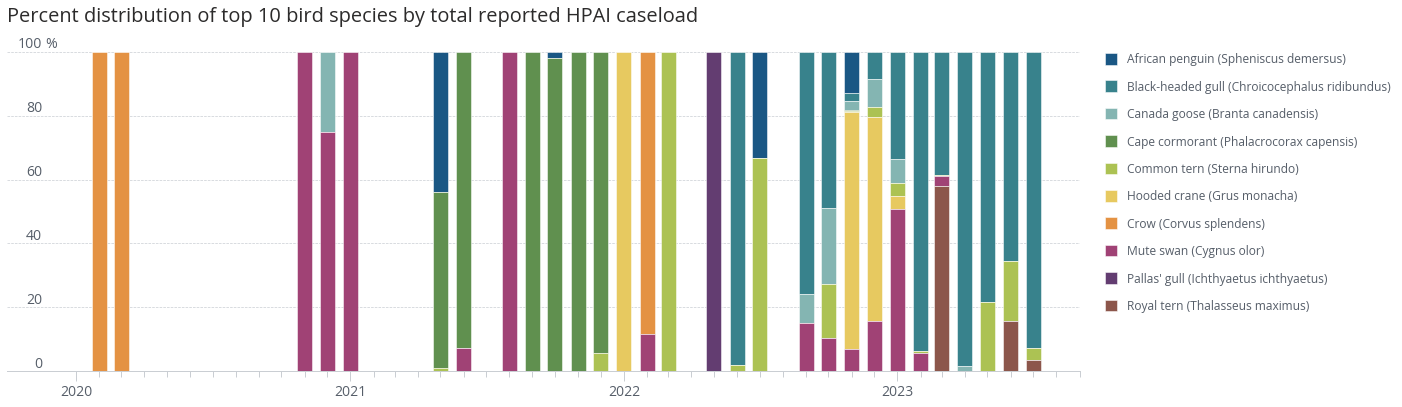

In [359]:
# Format figure
fig, ax = plt.subplots(figsize=(20,6))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=pivot_df['yearMonth']
y1=pivot_df['Spheniscus demersus']
y2=pivot_df['Chroicocephalus ridibundus']
y3=pivot_df['Branta canadensis']
y4=pivot_df['Phalacrocorax capensis']
y5=pivot_df['Sterna hirundo']
y6=pivot_df['Grus monacha']
y7=pivot_df['Corvus splendens']
y8= pivot_df['Cygnus olor']
y9 = pivot_df['Ichthyaetus ichthyaetus']
y10 =pivot_df['Thalasseus maximus']

# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y1, bottom=y2+y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[0], label='African penguin (Spheniscus demersus)') 
plt.bar(x, y2, bottom=y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[1], label='Black-headed gull (Chroicocephalus ridibundus)')
plt.bar(x, y3, bottom=y4+y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[2], label='Canada goose (Branta canadensis)')
plt.bar(x, y4, bottom=y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[3], label='Cape cormorant (Phalacrocorax capensis)')
plt.bar(x, y5, bottom=y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[4], label='Common tern (Sterna hirundo)')
plt.bar(x, y6, bottom=y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[5], label='Hooded crane (Grus monacha)')
plt.bar(x, y7, bottom=y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[6], label='Crow (Corvus splendens)')
plt.bar(x, y8, bottom=y9+y10, linewidth=0.5,width=20, align="center", color=colors[8], label='Mute swan (Cygnus olor)')
plt.bar(x, y9, bottom=y10, linewidth=0.5, width=20, align="center", color=colors[9], label="Pallas' gull (Ichthyaetus ichthyaetus)")
plt.bar(x, y10, bottom=0, linewidth=0.5, width=20, align="center", color=colors[10], label='Royal tern (Thalasseus maximus)')


ax.xaxis_date()

# Define x-axis range
left = dt.date(2019, 10, 1)
right = dt.date(2023, 9, 1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,100)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "Percent distribution of top 10 bird species by total reported HPAI caseload"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("%", rotation=0,loc='top',labelpad=-50,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")

# # after plotting the data, format the labels
# current_values = plt.gca().get_yticks()
# plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.30,1.03),labelcolor=chart[1],labelspacing=1.2)


plt.tight_layout()
# plt.show()
plt.savefig('figures/hpai_bird_percent_2020.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

In [327]:

# Pivot the DataFrame with species as columns
pivot_master = master.pivot_table(index='yearMonth', columns='class', values='monthlyCases', aggfunc='sum', fill_value=0)

# Flatten the DataFrame
pivot_master.reset_index(inplace=True)

# Set 'yearMonth' as the index again
pivot_master.set_index('yearMonth', inplace=True)

# Resample the DataFrame and forward fill missing months
pivot_master = pivot_master.asfreq('MS',fill_value=0).reset_index()

In [328]:
pivot_master.head()

class,yearMonth,Actinopteri,Aves,Mammalia
0,2005-07-01,0,3628,0
1,2005-08-01,0,29021,0
2,2005-09-01,0,44,0
3,2005-10-01,0,15556,0
4,2005-11-01,0,2878,0


In [164]:
# # Format figure
# fig, ax = plt.subplots(figsize=(figure_size))
# ax.spines.left.set_visible(False)

# # Format bottom axis
# for axis in ['bottom']:
#     ax.spines[axis].set_color(chart[2])
    
# # Add grid lines    
# plt.grid(axis='y')

# x = pivot_master['yearMonth']
# y1 = pivot_master['Aves']
# y2 = pivot_master['Mammalia']
# y3 = pivot_master['Actinopteri']



# # Plot bars
# # The thing that gets plotted last in this list gets plotted on the bottom

# plt.bar(x, y1, bottom=y2+y3, linewidth=0.5,width=20, align="center", color=colors[6], label='Birds')
# plt.bar(x, y2, bottom=y3, linewidth=0.5, width=20, align="center", color=colors[8], label='Mammals')
# plt.bar(x, y3, bottom=0, linewidth=0.5, width=20, align="center", color=colors[1], label='Fish')


# ax.xaxis_date()

# # Define x-axis range
# left = dt.date(2019, 10, 1)
# right = dt.date(2023, 9, 1)

# # Changes x-axis range
# plt.gca().set_xbound(left, right)

# # Changes y-axis range
# plt.gca().set_ybound(0,3000000)

# # Set major and minor date tick locators
# maj_loc = mdates.YearLocator()
# ax.xaxis.set_major_locator(maj_loc)
# min_loc = mdates.MonthLocator()
# ax.xaxis.set_minor_locator(min_loc)

# # Set major date tick formatter
# maj_fmt = mdates.DateFormatter('%Y')
# ax.xaxis.set_major_formatter(maj_fmt)

# # Hide minor tick labels
# ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# # Set title
# title = "HPAI case distribution among taxonomic classes"
# plt.title(title, fontdict=titlefont, loc='left')

# # Set x-axis label
# plt.xlabel("")

# # Extend x-axis without showing labels
# for label in ax.xaxis.get_ticklabels()[:1]:
#     label.set_visible(False)
    
# for x in ax.xaxis.get_major_ticks()[:1]:
#     x.set_visible(False) 
    
# for x in ax.xaxis.get_minor_ticks()[:3]:
#     x.set_visible(False)

# # Format y-axis label
# plt.ylabel("million cases", rotation=0,loc='top',labelpad=-110,color=chart[1])
# for tick in ax.get_yticklabels():
#     tick.set_verticalalignment("bottom")

    
# # Custom label formatter for y-axis
# def millions_formatter(x, pos):
#     return float(x/1e6)

# # Apply the custom label formatter to y-axis
# ax.yaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))

# # # after plotting the data, format the labels
# # current_values = plt.gca().get_yticks()
# # plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# # Get the legend and modify the handles
# handles, labels = ax.get_legend_handles_labels()
# leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.10,1.03),labelcolor=chart[1],labelspacing=1.2)


# # plt.tight_layout()
# # plt.show()
# # plt.savefig('figures/hpai_cases_class_2020-2023.png', dpi=1200, facecolor='w', 
# #             edgecolor='w', 
# #             orientation='portrait',bbox_inches='tight')

In [141]:
# Filter the DataFrame to only include rows where class is "mammalia"
mammals = pivot_master[['yearMonth',"Mammalia"]]

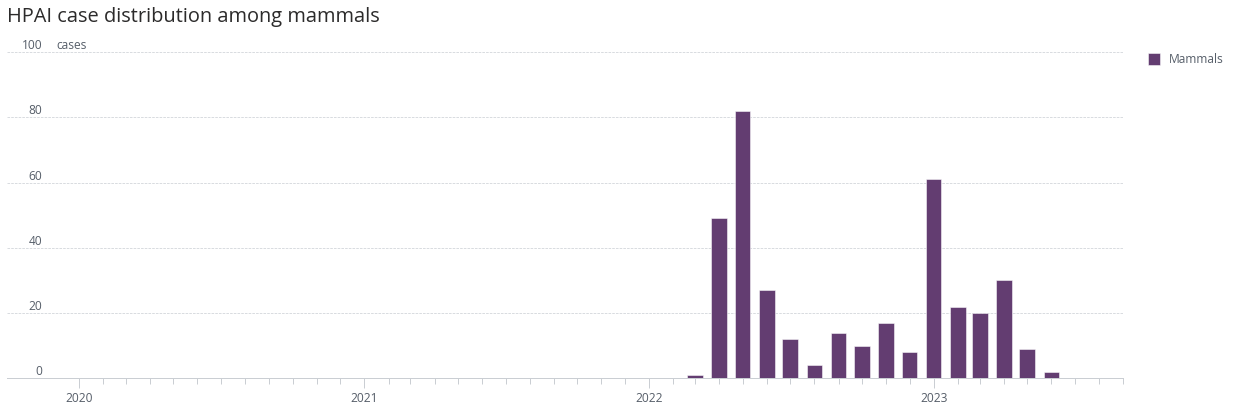

In [147]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

x = mammals['yearMonth']
y2 = mammals['Mammalia']


# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y2, bottom=0, linewidth=0.5, width=20, align="center", color=colors[9], label='Mammals')

ax.xaxis_date()


# Define x-axis range
left = dt.date(2019, 10, 1)
right = dt.date(2023, 9, 1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,100)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "HPAI case distribution among mammals"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("cases", rotation=0,loc='top',labelpad=-80,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")

    
# # Custom label formatter for y-axis
# def billions_formatter(x, pos):
#     return float(x/1e9)

# # Apply the custom label formatter to y-axis
# ax.yaxis.set_major_formatter(plt.FuncFormatter(billions_formatter))

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.10,1.03),labelcolor=chart[1],labelspacing=1.2)


# plt.tight_layout()
# plt.show()
plt.savefig('figures/hpai_cases_mammals_2020-2023.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

In [227]:
uq = pd.read_csv("data/event_host_path_pairings_count_2020-23.csv")
country_match = pd.read_csv('data/country_match.csv')

uq = pd.merge(uq, country_match, left_on="country",right_on="iso2", how = "inner")
uq = uq.drop(['name','iso2','country'], axis=1)

uq['iso3']=uq['iso3'].apply(remove_chars)

In [228]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={"iso_a3":"iso3"})
cols = ['name','iso3','geometry']
world = world[cols]
world = world.sort_values(by="iso3")

In [229]:
# Fix issues in geopandas
world.loc[world['name'] == 'France', 'iso3'] = 'FRA'
world.loc[world['name'] == 'Norway', 'iso3'] = 'NOR'
world.loc[world['name'] == 'Somaliland', 'iso3'] = 'SOM'
world.loc[world['name'] == 'Kosovo', 'iso3'] = 'RKS'

In [230]:
uq = pd.merge(world,uq,on='iso3',how='outer')

In [231]:
uq = uq[(uq.name != "Antarctica")]

In [232]:
uq["COUNT(DISTINCT combo)"] = uq["COUNT(DISTINCT combo)"].fillna(-10)

In [233]:
uq["COUNT(DISTINCT combo)"].max()

63.0

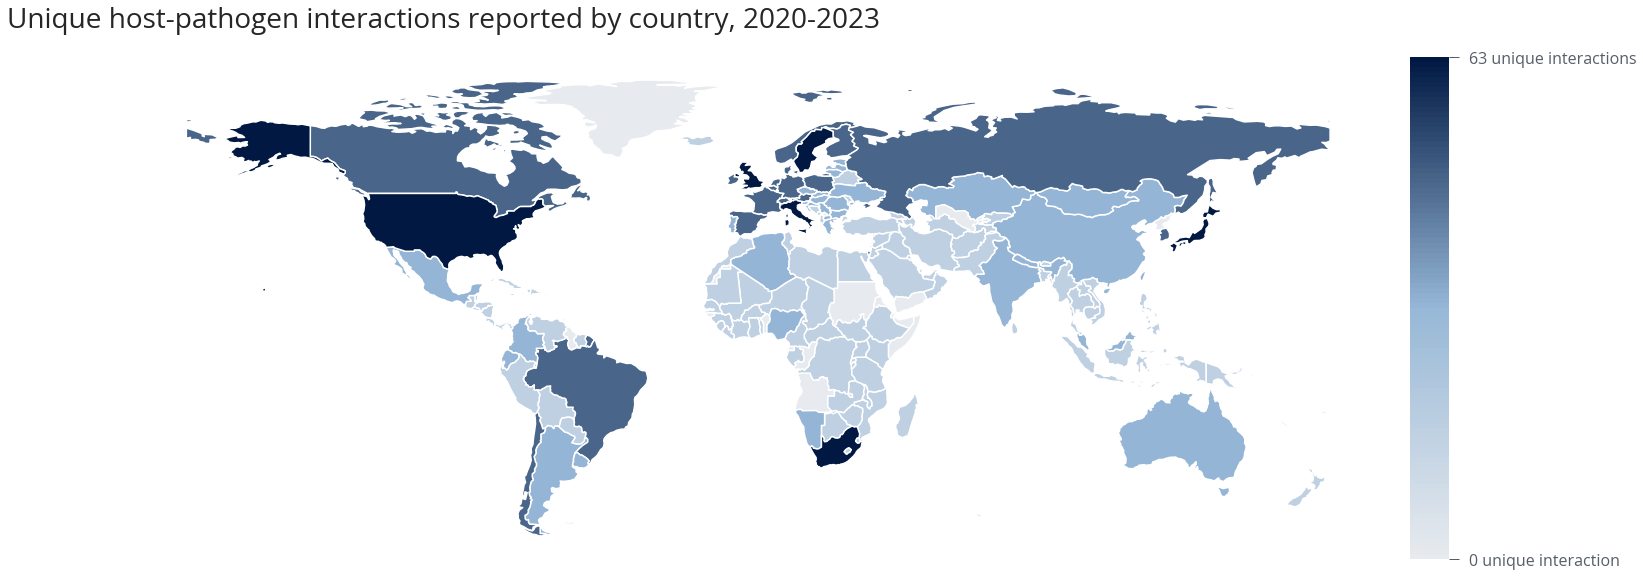

In [235]:
# Create a new figure and axes
fig, ax = plt.subplots(figsize=(24, 18))

vmin=-10
vmax=63

# Plot the map
uq.plot(column='COUNT(DISTINCT combo)',
           cmap=cm,
           scheme='naturalbreaks',
           legend=False,
           ax=ax
          )

# Adjust margins and set title
ax.margins(x=0.05) 

ttl = ax.set_title('Unique host-pathogen interactions reported by country, 2020-2023',fontsize=28)
ttl.set_position([0.25,1.05])


# Set the background color of the map
ax.set(facecolor='white')

# Turn axis off
ax.axis('off')

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
sm = plt.cm.ScalarMappable(cmap=cm,
                           norm=plt.Normalize(vmin=vmin,
                                              vmax=vmax))


sm._A = []
cbar = plt.colorbar(sm,cax=cax,drawedges=False)
cbar.set_ticks([vmin,vmax])
cbar.ax.yaxis.set_ticklabels(["0 unique interaction","63 unique interactions"])
cbar.ax.yaxis.set_tick_params(direction='out',length=10,width=1,pad=10,colors=chart[1],labelsize=16)
cbar.outline.set_visible(False)

# # # # # Display the map
# # plt.tight_layout()
# plt.show()

# # Save
plt.savefig('figures/uq_host_path_from_events_2020-23.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

In [271]:
uq_time = pd.read_csv("data/event_host_path_pairings_yearMonth.csv")

uq_time['yearMonth'] = uq_time['yearMonth'].apply(remove_chars)
uq_time['yearMonth'] = pd.to_datetime(uq_time['yearMonth'], format="%Y-%m")

In [272]:
uq_time_2006 = uq_time.loc[uq_time['yearMonth']>='2006-01-01']
uq_time_2006 = uq_time_2006.loc[uq_time_2006['yearMonth']<'2009-01-01']

In [274]:
uq_time_2020 = uq_time.loc[uq_time['yearMonth']>='2020-01-01']
uq_time_2020 = uq_time_2020.loc[uq_time_2020['yearMonth']<'2023-07-01']

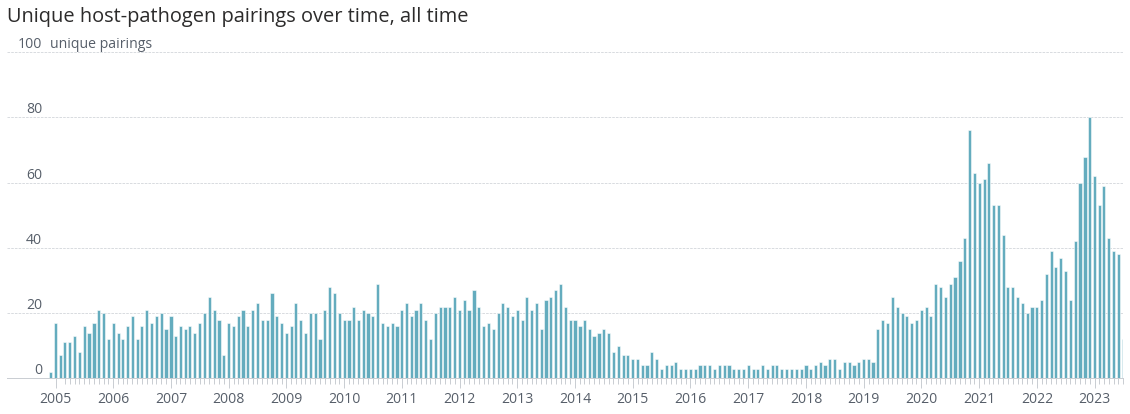

In [306]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

x = uq_time['yearMonth']
y2 = uq_time['COUNT(DISTINCT combo)']


# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y2, bottom=0, linewidth=0.5, width=20, align="center", color=colors[1])

ax.xaxis_date()


# Define x-axis range
left = dt.date(2004, 3, 1)
right = dt.date(2023, 7, 1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,100)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "Unique host-pathogen pairings over time, all time"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:11]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("unique pairings", rotation=0,loc='top',labelpad=-145,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")

    
# # Custom label formatter for y-axis
# def billions_formatter(x, pos):
#     return float(x/1e9)

# # Apply the custom label formatter to y-axis
# ax.yaxis.set_major_formatter(plt.FuncFormatter(billions_formatter))

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# # Get the legend and modify the handles
# handles, labels = ax.get_legend_handles_labels()
# leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.10,1.03),labelcolor=chart[1],labelspacing=1.2)


# plt.tight_layout()
# plt.show()
plt.savefig('figures/uq_host_path_pairings_from_events_over_time_alltime.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

In [310]:
from seaborn.matrix import _HeatMapper
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from seaborn.external.six import string_types

from seaborn.utils import despine, axis_ticklabels_overlap, relative_luminance, to_utf8

class _ScatterMapper(_HeatMapper):
    """
    Draw a scattermap plot, similar to heatmap plot, but use scatter dots instead of heatmap
    """

    def __init__(self, data,
                 marker, marker_size,
                 vmin, vmax, cmap, center, robust, cbar, cbar_kws,
                 xticklabels=True, yticklabels=True, mask=None):

        super(_ScatterMapper, self).__init__(
            data, vmin, vmax, cmap, center, robust, cbar=cbar, cbar_kws=cbar_kws,
            xticklabels=xticklabels, yticklabels=yticklabels, mask=mask,
            # Don't support annotation
            annot=False, fmt=None, annot_kws=None,
        )

        self.marker = marker

        if isinstance(marker_size, float) or isinstance(marker_size, int):
            self.marker_size = marker_size
        elif isinstance(marker_size, pd.DataFrame):
            self.marker_size = marker_size.loc[self.data.index, self.data.columns].values
        else:
            self.marker_size = marker_size
        
    def plot(self, ax, cax, kws):
        """Draw the scattermap on the provided Axes."""
        # Remove all the Axes spines
        despine(ax=ax, left=True, bottom=True)

        # Draw the heatmap
        data = self.plot_data

        range_y = np.arange(data.shape[0], dtype=int) + 0.5
        range_x = np.arange(data.shape[1], dtype=int) + 0.5
        x, y = np.meshgrid(range_x, range_y)

        hmap = ax.scatter(x, y,
                          c=data,
                          marker=self.marker,
                          cmap=self.cmap,
                          vmin=self.vmin, vmax=self.vmax,
                          s=self.marker_size, **kws)

        # Set the axis limits
        ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))

        # Possibly add a colorbar
        if self.cbar:
            cb = ax.figure.colorbar(hmap, cax, ax, **self.cbar_kws)
            cb.outline.set_linewidth(0)
            # If rasterized is passed to pcolormesh, also rasterize the
            # colorbar to avoid white lines on the PDF rendering
            if kws.get('rasterized', False):
                cb.solids.set_rasterized(True)

        # Add row and column labels
        if isinstance(self.xticks, string_types) and self.xticks == "auto":
            xticks, xticklabels = self._auto_ticks(ax, self.xticklabels, 0)
        else:
            xticks, xticklabels = self.xticks, self.xticklabels

        if isinstance(self.yticks, string_types) and self.yticks == "auto":
            yticks, yticklabels = self._auto_ticks(ax, self.yticklabels, 1)
        else:
            yticks, yticklabels = self.yticks, self.yticklabels

        ax.set(xticks=xticks, yticks=yticks)
        xtl = ax.set_xticklabels(xticklabels)
        ytl = ax.set_yticklabels(yticklabels, rotation="vertical")

        # Possibly rotate them if they overlap
        ax.figure.draw(ax.figure.canvas.get_renderer())
        if axis_ticklabels_overlap(xtl):
            plt.setp(xtl, rotation="vertical")
        if axis_ticklabels_overlap(ytl):
            plt.setp(ytl, rotation="horizontal")

        # Add the axis labels
        ax.set(xlabel=self.xlabel, ylabel=self.ylabel)

        # Annotate the cells with the formatted values
        if self.annot:
            self._annotate_heatmap(ax, hmap)

        # Invert the y axis to show the plot in matrix form
        ax.invert_yaxis()

def scattermap(data,
               marker='o',
               marker_size=100,
               vmin=None, vmax=None, cmap=None, center=None, robust=False,
               linewidths=0, linecolor="white",
               cbar=True, cbar_kws=None, cbar_ax=None,
               square=False, xticklabels="auto", yticklabels="auto",
               mask=None, ax=None, **kwargs):
    """Plot rectangular data as a color-encoded matrix.
    This function is similar to `sns.heatmap`, as it is an Axes-level function that will draw the
    heatmap into the currently-active Axes if none is provided to the ``ax`` argument.
    The main difference is that instead of drawing an actual heatmap with filled squares,
    this function will use the `plt.scatter` behind the scenes to draw a scatterplot-heatmap.
    The default is set to plot a grid of circles, however this can be changed via `marker`
    parameter.
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    marker: string, optional
        Marker to use: any marker that `pyplot.scatter` supports. Defaults to circle.
    marker_size: int or rectangular dataset
        Either an integer to set the marker size of all data points to,
        or a 2D dataset (like in `data`) that sets individual point sizes.
        Defaults to 100.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise they are inferred from the
        data and other keyword arguments.
    cmap : matplotlib colormap name or object, or list of colors, optional
        The mapping from data values to color space. If not provided, the
        default will depend on whether ``center`` is set.
    center : float, optional
        The value at which to center the colormap when plotting divergant data.
        Using this parameter will change the default ``cmap`` if none is
        specified.
    robust : bool, optional
        If True and ``vmin`` or ``vmax`` are absent, the colormap range is
        computed with robust quantiles instead of the extreme values.
    linewidths : float, optional
        Width of the border lines that will surround the markers
    linecolor : color, optional
        Color of the border lines to the markers
    cbar : boolean, optional
        Whether to draw a colorbar.
    cbar_kws : dict of key, value mappings, optional
        Keyword arguments for `fig.colorbar`.
    cbar_ax : matplotlib Axes, optional
        Axes in which to draw the colorbar, otherwise take space from the
        main Axes.
    square : boolean, optional
        If True, set the Axes aspect to "equal" so each cell will be
        square-shaped.
    xticklabels, yticklabels : "auto", bool, list-like, or int, optional
        If True, plot the column names of the dataframe. If False, don't plot
        the column names. If list-like, plot these alternate labels as the
        xticklabels. If an integer, use the column names but plot only every
        n label. If "auto", try to densely plot non-overlapping labels.
    mask : boolean array or DataFrame, optional
        If passed, data will not be shown in cells where ``mask`` is True.
        Cells with missing values are automatically masked.
    ax : matplotlib Axes, optional
        Axes in which to draw the plot, otherwise use the currently-active
        Axes.
    kwargs : other keyword arguments
        All other keyword arguments are passed to ``ax.pcolormesh``.
    Returns
    -------
    ax : matplotlib Axes
        Axes object with the heatmap.
    See also
    --------
    clustermap : Plot a matrix using hierachical clustering to arrange the
                 rows and columns.
    Examples
    --------
    Plot a scattermap for a numpy array:
    .. plot::
        :context: close-figs
        >>> import numpy as np; np.random.seed(0)
        >>> import seaborn as sns; sns.set()
        >>> uniform_data = np.random.rand(10, 12)
        >>> ax = scattermap(uniform_data)
    Draw on white axes
    .. plot::
        :context: close-figs
        >>> uniform_data = np.random.rand(10, 12)
        >>> with sns.axes_style("white"):
        ...     ax = scattermap(uniform_data)
    Change the limits of the scattermap:
    .. plot::
        :context: close-figs
        >>> ax = scattermap(uniform_data, vmin=0, vmax=1)
    Plot a scattermap for data centered on 0 with a diverging colormap:
    .. plot::
        :context: close-figs
        >>> normal_data = np.random.randn(10, 12)
        >>> ax = scattermap(normal_data, center=0)
    Plot a dataframe with meaningful row and column labels:
    .. plot::
        :context: close-figs
        >>> flights = sns.load_dataset("flights")
        >>> flights = flights.pivot("month", "year", "passengers")
        >>> ax = scattermap(flights)
    Add border lines around each glyph:
    .. plot::
        :context: close-figs
        >>> ax = scattermap(flights, linewidths=1, linecolor='black')
    Use a different colormap:
    .. plot::
        :context: close-figs
        >>> ax = scattermap(flights, cmap="YlGnBu")
    Center the colormap at a specific value:
    .. plot::
        :context: close-figs
        >>> ax = scattermap(flights, center=flights.loc["January", 1955])
    Plot every other column label and don't plot row labels:
    .. plot::
        :context: close-figs
        >>> data = np.random.randn(50, 20)
        >>> ax = scattermap(data, xticklabels=2, yticklabels=False)
    Don't draw a colorbar:
    .. plot::
        :context: close-figs
        >>> ax = scattermap(flights, cbar=False)
    Use different axes for the colorbar:
    .. plot::
        :context: close-figs
        >>> grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
        >>> f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
        >>> ax = scattermap(flights, ax=ax,
        ...                  cbar_ax=cbar_ax,
        ...                  cbar_kws={"orientation": "horizontal"})
    Use a mask to plot only part of a matrix
    .. plot::
        :context: close-figs
        >>> corr = np.corrcoef(np.random.randn(10, 200))
        >>> mask = np.zeros_like(corr)
        >>> mask[np.triu_indices_from(mask)] = True
        >>> with sns.axes_style("white"):
        ...     ax = scattermap(corr, mask=mask, vmax=.3, square=True)
     Change glyph, plot stars instead of circles
    .. plot::
        :context: close-figs
        >>> ax = scattermap(corr, vmax=.3, square=True, marker='*')
    Plot multiple markers on the same plot
    >>> corr = np.corrcoef(np.random.randn(10, 200))
    >>> mask = np.zeros_like(corr)
    >>> mask[np.triu_indices_from(mask)] = True
    >>> with sns.axes_style("white"):
    ...     ax = scattermap(corr, mask=mask, vmax=.3, square=True)
    ...     ax = scattermap(corr, mask=mask.T, vmax=.3, square=True, ax=ax, marker='*', cbar=False)
    Specify size for points
    .. plot::
        :context: close-figs
    >>> with sns.axes_style("white"):
    ...     ax = scattermap(corr, vmax=.3, square=True, marker_size=np.abs(corr)*300)
    """
    # Initialize the plotter object
    plotter = _ScatterMapper(data,
                             marker, marker_size,
                             vmin, vmax, cmap, center, robust,
                             cbar, cbar_kws, xticklabels,
                             yticklabels, mask)

    # Add the pcolormesh kwargs here
    kwargs["linewidths"] = linewidths
    kwargs["edgecolor"] = linecolor

    # Draw the plot and return the Axes
    if ax is None:
        ax = plt.gca()
    if square:
        ax.set_aspect("equal")
    plotter.plot(ax, cbar_ax, kwargs)
    return ax


In [423]:
def process_dataframe(df):
    df["yearMonth"] = df["yearMonth"].apply(remove_chars)
    df["species"] = df["species"].apply(remove_chars)
    df['country'] = df['country'].apply(remove_chars)
    df['class'] = df['class'].apply(remove_chars)
    df['yearMonth'] = pd.to_datetime(df['yearMonth'], format="%Y-%m-%d")
    
    # # Agg on country by year
    # df = df.groupby(['country']).agg({'monthlyCases': 'sum'}).reset_index()
    # df.rename(columns={'monthlyCases': datasource+'Cases'}, inplace=True)    
    return df

In [449]:
top = pd.read_csv('data/all_influenza_host_species_class_country_month.csv')
top = process_dataframe(top)

country_match = pd.read_csv("data/country_match.csv")
country_match['iso2'] = country_match['iso2'].apply(remove_chars)


top = pd.merge(top, country_match, left_on = "country", right_on = "iso2")
top = top.drop(columns=['country'])

top['iso3'] = top['iso3'].apply(remove_chars)
top['name'] = top['name'].apply(remove_chars)

In [450]:
include = ["CN","CA","FR","ZA","SE","MX","CH","ES","ZW","US","IT","PH","JP","NO","QA","DK","AR","AU","PT","AT"]
top20 = top[top['iso2'].isin(include)]

top20_mammals = top20.loc[top20['class']=="Mammalia"]

In [451]:
grouped = top20_mammals.groupby(['iso2','name','iso3','species'], as_index=False)['monthlyCases'].sum()

In [452]:
grouped.head()

,iso2,name,iso3,species,monthlyCases
0,AR,Argentina,ARG,Homo sapiens,470402
1,AR,Argentina,ARG,Sus scrofa,2455
2,AT,Austria,AUT,Homo sapiens,283764
3,AU,Australia,AUS,Equidae,1454
4,AU,Australia,AUS,Homo sapiens,433178


In [453]:
regions = {'EUR': ['AUT','FRA', 'ITA', 'NOR', 'DNK', 'PRT', 'ESP', 'CHE', 'SWE'],
           'EMR': ['QAT'],
           'WPR': ['AUS','CHN','JPN','PHL'],
           'AMR': ['ARG','USA','CAN','MEX'],
           'AFR': ['ZWE', 'ZAF']
}

# Function to map iso3 code to region
def get_region(iso3_code):
    for region, countries_list in regions.items():
        if iso3_code in countries_list:
            return region
    return 'Unknown'  # If iso3 code is not found in the regions dictionary

# Create a new column 'Region' by applying the get_region function to 'iso3' column
grouped['region'] = grouped['iso3'].apply(get_region)
grouped=grouped.sort_values(by=["region",'monthlyCases'],ascending=False)

In [457]:
grouped = pd.read_csv('data/top20_countries_by_human_cases.csv')

In [458]:
grouped.head()

,iso2,name,iso3,commonName,species,monthlyCases,region
0,JP,Japan,JPN,Red fox,Vulpes vulpes,3,WPR
1,FR,France,FRA,Red fox,Vulpes vulpes,1,EUR
2,US,United States,USA,Red fox,Vulpes vulpes,87,AMR
3,CA,Canada,CAN,Red fox,Vulpes vulpes,55,AMR
4,US,United States,USA,Brown bear,Ursus arctos,3,AMR


In [459]:
# Create a pivot table with hostSpecies as rows, pathogenSpecies as columns, and caseload as values
hm= grouped.pivot_table(index='commonName', columns=['name'], values='monthlyCases',sort=True)

In [460]:
hm['Total'] = hm.sum(axis=1)
hm = hm.sort_values(by='Total',ascending=False)

hm = hm.drop(columns="Total")
cols = ['South Africa', 'Zimbabwe','Argentina','Canada','Mexico','United States','Qatar','Austria','Denmark','France','Italy','Portugal','Norway','Spain','Sweden','Switzerland','Australia','China','Japan','Philippines']
hm = hm[cols]

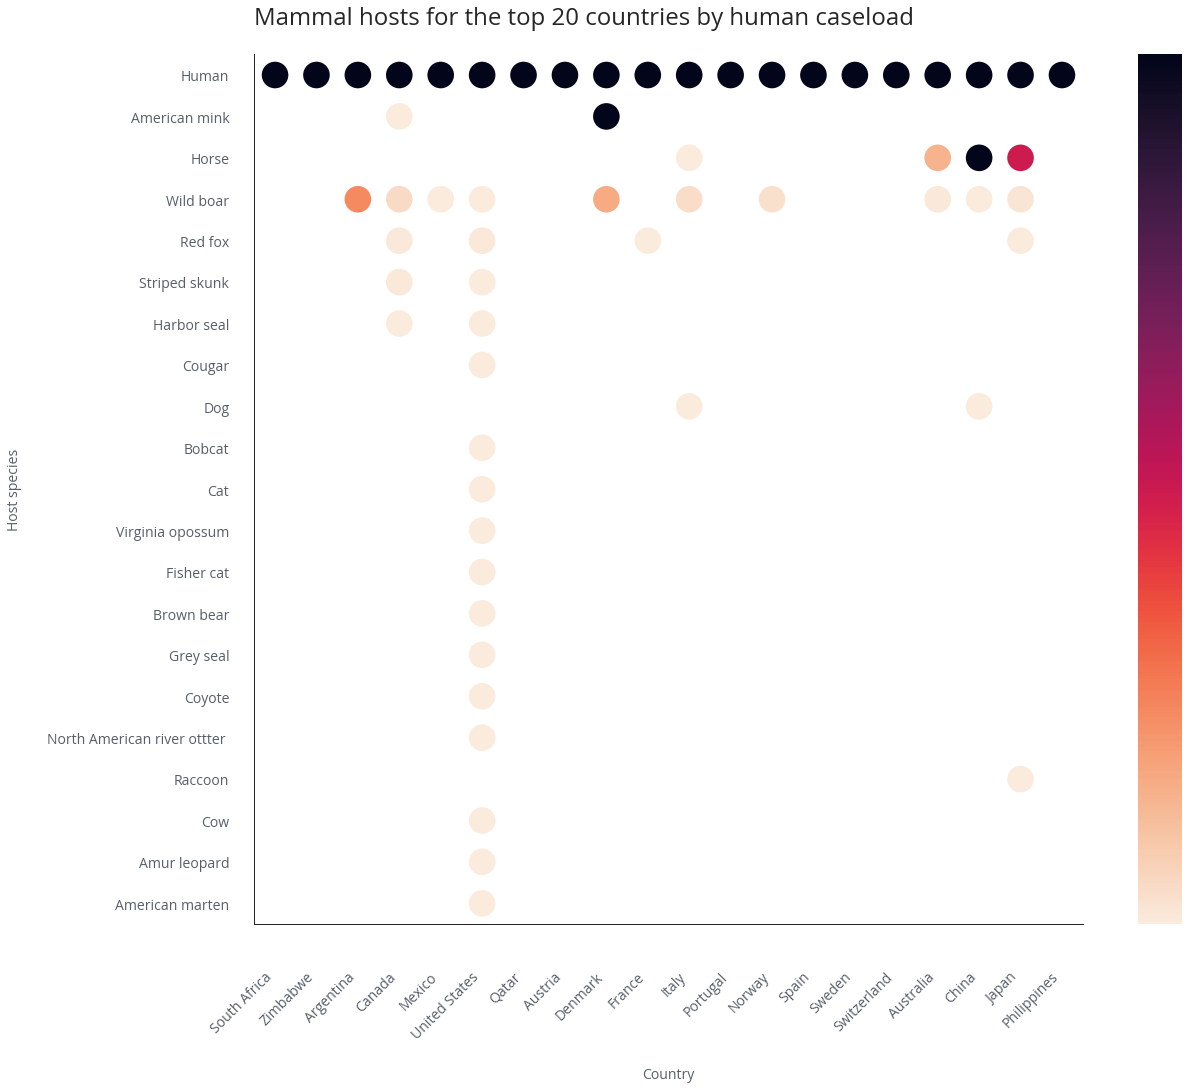

In [466]:

# Set up the heatmap figure

fig, ax = plt.subplots(figsize=(20, 16))

vmin = 1
vmax = 10000

# Create the heatmap using seaborn with a diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
im = scattermap(data=hm, cbar_kws={"ticks":[],"shrink":1.0}, cmap="rocket_r", marker_size = 1000, linewidths=5, ax=ax, vmin=vmin, vmax=vmax)

# Set tick labels and axis labels
ax.set_xlabel('Country',labelpad=25)
ax.set_ylabel('Host species',labelpad=25)
ax.set_title("Mammal hosts for the top 20 countries by human caseload",loc="left",size=24)


# Set tick labels and axis labels
ax.tick_params(axis='x',pad=45,length=0,labelsize=10,width=100)
plt.setp(ax.get_xticklabels(), rotation=45,ha="right",size=14)


ax.tick_params(axis='y',pad=25,width=30,labelsize=10)
ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)
plt.setp(ax.get_yticklabels(), rotation=0,size=14)


# Spines
ax.spines.bottom.set_visible(True)
ax.spines.left.set_visible(True)

ax.set_aspect('equal')

# Set title and show the plot
plt.show()

# plt.savefig('figures/dot_hostpath_rankedtop20.pdf', dpi=1200,facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait',bbox_inches='tight')

In [7]:
def process_dataframe(df, datasource):
    df["yearMonth"] = df["yearMonth"].apply(remove_chars)
    df["species"] = df["species"].apply(remove_chars)
    df['country'] = df['country'].apply(remove_chars)
    df['class'] = df['class'].apply(remove_chars)
    df['yearMonth'] = pd.to_datetime(df['yearMonth'], format="%Y-%m-%d")
        
    # # Agg on country by year
    # df = df.groupby(['country']).agg({'monthlyCases': 'sum'}).reset_index()
    df.rename(columns={'monthlyCases': datasource+'Cases'}, inplace=True)    
    return df

In [8]:
human = pd.read_csv("data/influenza_AH5_cases_country_species_class_month.csv")
animal = pd.read_csv("data/h5n1_cases_country_species_class_month.csv")

human = process_dataframe(human, "human")
animal = process_dataframe(animal, "animal")

# Merge FluNet and WAHIS
merge = pd.merge(human, animal,on=["country","yearMonth"],how="outer")

country_match = pd.read_csv("data/country_match.csv")
country_match["iso2"] = country_match["iso2"].apply(remove_chars)
country_match["iso3"] = country_match["iso3"].apply(remove_chars)


merge = pd.merge(merge, country_match, left_on="country",right_on="iso2",how="outer")

In [9]:
merge.head()

,yearMonth,country,species_x,class_x,humanCases,species_y,class_y,animalCases,name,iso2,iso3
0,2013-05-01,AR,Homo sapiens,Mammalia,40.0,NaN,NaN,NaN,"""Argentina""",AR,ARG
1,2015-10-01,BD,Homo sapiens,Mammalia,22.0,NaN,NaN,NaN,"""Bangladesh""",BD,BGD
2,2007-10-01,BD,NaN,NaN,NaN,Aves,Aves,243.0,"""Bangladesh""",BD,BGD
3,2007-11-01,BD,NaN,NaN,NaN,Aves,Aves,1194.0,"""Bangladesh""",BD,BGD
4,2007-12-01,BD,NaN,NaN,NaN,Aves,Aves,2504.0,"""Bangladesh""",BD,BGD


In [146]:
# Define the bins

# Update 'human_bin' based on conditions using loc
merge.loc[merge['humanCases'] >= 6239, 'human_bin'] = '[0.67, 1.0)'
merge.loc[(merge['humanCases'] < 6239) & (merge['humanCases'] >= 37), 'human_bin'] = '[0.34, 0.66)'
merge.loc[merge['humanCases'] < 37, 'human_bin'] = '[-0.001, 0.33)'

# Update 'animal_bin' based on conditions using loc
merge.loc[merge['animalCases'] >= 1, 'animal_bin'] = '[0.67,1.0)'
merge.loc[(merge['animalCases'] < 3719) & (merge['animalCases'] >= 3720), 'animal_bin'] = '[0.34,0.66)'
merge.loc[merge['animalCases'] < 3720, 'animal_bin'] = '[0.0,0.33)'

# Combine x and y codes to create Bi_Class
merge['biClass'] = merge['human_bin'].astype('str') + merge['animal_bin'].astype('str')

merge['biClass'] = merge['biClass'].replace("[0.34, 0.66)nan","[0.34, 0.66)[0.0,0.33)")
merge['biClass'] = merge['biClass'].replace("nan[0.0,0.33)","[-0.001, 0.33)[0.0,0.33)")
merge['biClass'] = merge['biClass'].replace("nan[0.67,1.0)","[-0.001, 0.33)[0.67,1.0)")
merge['biClass'] = merge['biClass'].replace("[-0.001, 0.33)nan","[-0.001, 0.33)[0.0,0.33)")
merge['biClass'] = merge['biClass'].replace("nannan","[-0.001, 0.33)[0.0,0.33)")


In [147]:
print('Number of unique elements in Bi_Class =', len(merge['biClass'].unique()))

print(sorted(merge["biClass"].unique()))

Number of unique elements in Bi_Class = 6
['[-0.001, 0.33)[0.0,0.33)', '[-0.001, 0.33)[0.67,1.0)', '[0.34, 0.66)[0.0,0.33)', '[0.34, 0.66)[0.67,1.0)', '[0.67, 1.0)[0.0,0.33)', '[0.67, 1.0)[0.67,1.0)']


In [10]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={"iso_a3":"iso3","name":"countryname"})
cols = ['countryname','iso3','geometry']
world = world[cols]
world = world.sort_values(by="iso3")

# Fix issues in geopandas
world.loc[world['countryname'] == 'France', 'iso3'] = 'FRA'
world.loc[world['countryname'] == 'Norway', 'iso3'] = 'NOR'
world.loc[world['countryname'] == 'Somaliland', 'iso3'] = 'SOM'
world.loc[world['countryname'] == 'Kosovo', 'iso3'] = 'RKS'

In [11]:
df = pd.merge(world,merge,on='iso3',how='outer')
df = df[(df.countryname != "Antarctica")]

In [159]:
df['biClass'].loc[df['biClass'].isna()] = '[-0.001, 0.33)[0.0,0.33)'

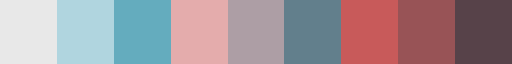

In [160]:
# All colors to create a complete legend
all_colors = ['#e8e8e8', '#b0d5df', '#64acbe', '#e4acac', '#ad9ea5', '#627f8c', '#c85a5a', '#985356', '#574249']
cmap = matplotlib.colors.ListedColormap(all_colors)
cmap

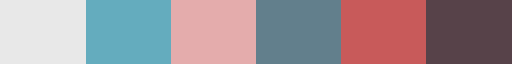

In [161]:
# Set of colors matching the elements of Bi_Class
# We have to exclude those that did not come up in the data
colors = ['#e8e8e8', # 1A
#           '#b0d5df', # 1B
          '#64acbe', # 1C
          '#e4acac', # 2A
          # '#ad9ea5', # 2B
          '#627f8c', # 2C
          '#c85a5a', # 3A
          # '#985356', # 3B
          '#574249' # 3C 
]
            
cmap = matplotlib.colors.ListedColormap(colors)
cmap



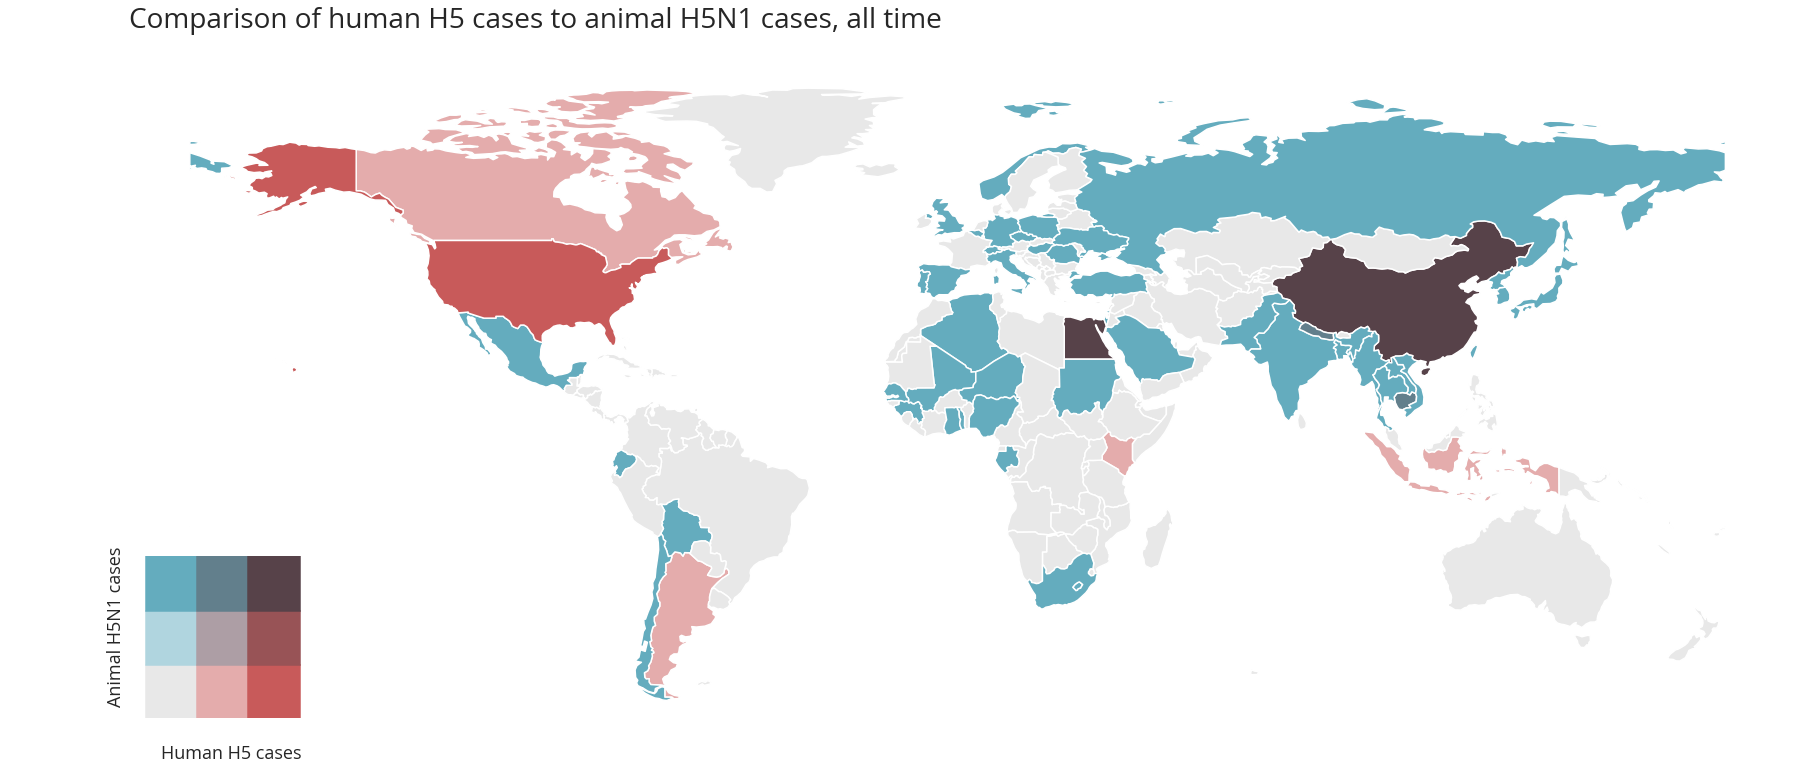

In [163]:
fig, ax = plt.subplots(figsize=(24,18))

# Adjust margins and set title
ax.margins(x=0.05) 


# Set the background color of the map
ax.set(facecolor='white')

# Turn axis off
ax.axis('off')
plt.tight_layout()

# Plot the map
df.plot(ax=ax,
           column='biClass',
           cmap=cmap, 
           categorical = True,
           legend = False)

plt.axis('off') # we don't need axis with coordinates
ttl = ax.set_title('Comparison of human H5 cases to animal H5N1 cases, all time',fontsize=28)
ttl.set_position([0.25,1.05])


# Step 2: draw the legend

# We're drawing a 3x3 "box" as 3 columns
# The xmin and xmax arguments axvspan are defined to create equally sized small boxes

img2 = fig # refer to the main figure
ax2 = fig.add_axes([-0.05, 0.25, 0.25, 0.125]) # add new axes to place the legend there
                                         # and specify its location 
alpha = 1 # alpha argument to make it more/less transperent

# Column 1
ax2.axvspan(xmin=0, xmax=0.33, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[0])
ax2.axvspan(xmin=0, xmax=0.33, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[1])
ax2.axvspan(xmin=0, xmax=0.33, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[2])

# Column 2
ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[3])
ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[4])
ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[5])

# Column 3
ax2.axvspan(xmin=0.66, xmax=1, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[6])
ax2.axvspan(xmin=0.66, xmax=1, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[7])
ax2.axvspan(xmin=0.66, xmax=1, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[8])

# Step 3: annoate the legend
ax2.tick_params(axis='both', which='both', length=0) # remove ticks from the big box
ax2.axis('off'); # turn off its axis
ax2.text(s='Human H5 cases', x=0.1, y=-0.25) # annotate x axis
ax2.text(s='Animal H5N1 cases', x=-0.25, y=0.1, rotation=90); # annotate y axis
# ax2.annotate("", xy=(0, 1), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", lw=2,color=chart[1])) # draw arrow for x 
# ax2.annotate("", xy=(1, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", lw=2,color=chart[1])) # draw arrow for y 
plt.savefig('figures/human_animal_h5_alltime.png', dpi=1200,facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')
# plt.show()


In [12]:
# Function to remove the first and last characters from a string
def remove_more(s):
    return s[4:-1]

In [13]:
gmpd = pd.read_csv("data/gmpd_uq_list.csv")
wahis = pd.read_csv("data/wahis_uq_list.csv")

gmpd['uq'] = gmpd['uq'].apply(remove_more)
wahis['uq'] = wahis['uq'].apply(remove_more)

In [14]:
gmpd_list = gmpd['uq'].tolist()

wahis_list = wahis['uq'].tolist()

# Find items that are different between gmpd and wahis
diff = set(wahis_list).difference(set(gmpd_list))

diff = list(diff)
diff_df = pd.DataFrame({'pairings': list(diff)})
diff_df.to_csv("data/wahis_only_uq_pairings.csv",index=True)

In [31]:
def process_dataframe(df, datasource):
    df["yearMonth"] = df["yearMonth"].apply(remove_chars)
    df["species"] = df["species"].apply(remove_chars)
    df['country'] = df['country'].apply(remove_chars)
    df['class'] = df['class'].apply(remove_chars)
    df['yearMonth'] = pd.to_datetime(df['yearMonth'], format="%Y-%m-%d")
        
    # # Agg on country by year
    # df = df.groupby(['country']).agg({'monthlyCases': 'sum'}).reset_index()
    df.rename(columns={'monthlyCases': datasource+'Cases'}, inplace=True)    
    return df

In [223]:
human = pd.read_csv("data/influenza_AH5_cases_country_species_class_month.csv")
animal = pd.read_csv("data/h5n1_cases_country_species_class_month.csv")

human = process_dataframe(human, "human")
animal = process_dataframe(animal, "animal")


# Merge FluNet and WAHIS
merge = pd.merge(human, animal,on=["country","yearMonth"],how="outer")

country_match = pd.read_csv("data/country_match.csv")
country_match["iso2"] = country_match["iso2"].apply(remove_chars)
country_match["iso3"] = country_match["iso3"].apply(remove_chars)


merge = pd.merge(merge, country_match, left_on="country",right_on="iso2",how="outer")

In [224]:
merge.head()

,yearMonth,country,species_x,class_x,humanCases,species_y,class_y,animalCases,name,iso2,iso3
0,2013-05-01,AR,Homo sapiens,Mammalia,40.0,NaN,NaN,NaN,"""Argentina""",AR,ARG
1,2015-10-01,BD,Homo sapiens,Mammalia,22.0,NaN,NaN,NaN,"""Bangladesh""",BD,BGD
2,2007-10-01,BD,NaN,NaN,NaN,Aves,Aves,243.0,"""Bangladesh""",BD,BGD
3,2007-11-01,BD,NaN,NaN,NaN,Aves,Aves,1194.0,"""Bangladesh""",BD,BGD
4,2007-12-01,BD,NaN,NaN,NaN,Aves,Aves,2504.0,"""Bangladesh""",BD,BGD


In [225]:
merge_2006 = merge.loc[merge['yearMonth']>='2006-01-01']
merge_2006 = merge_2006.loc[merge_2006['yearMonth']<'2009-01-01']

merge_2020 = merge.loc[merge['yearMonth']>='2020-01-01']
merge_2020 = merge_2020.loc[merge_2020['yearMonth']<'2023-07-01']

In [226]:
merge_2006 = merge_2006.groupby(['iso3']).agg({'humanCases': 'sum','animalCases':"sum"}).reset_index()
merge_2020 = merge_2020.groupby(['iso3']).agg({'humanCases': 'sum','animalCases':"sum"}).reset_index()


In [227]:
merge_2006['total']=merge_2006['humanCases']+merge_2006['animalCases']
merge_2020['total']=merge_2020['humanCases']+merge_2020['animalCases']

In [228]:
merge_2006['ratio'] = merge_2006['humanCases']/merge_2006['animalCases']
merge_2020['ratio'] = merge_2020['humanCases']/merge_2020['animalCases']

In [229]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={"iso_a3":"iso3"})
cols = ['name','iso3','geometry']
world = world[cols]
world = world.sort_values(by="iso3")

In [230]:
# Fix issues in geopandas
world.loc[world['name'] == 'France', 'iso3'] = 'FRA'
world.loc[world['name'] == 'Norway', 'iso3'] = 'NOR'
world.loc[world['name'] == 'Somaliland', 'iso3'] = 'SOM'
world.loc[world['name'] == 'Kosovo', 'iso3'] = 'RKS'

In [231]:
merge2006 = pd.merge(world,merge_2006,on='iso3',how='outer')
merge2020 = pd.merge(world,merge_2020,on='iso3',how='outer')

In [232]:
merge2006 = merge2006[(merge2006.name != "Antarctica")]
merge2020 = merge2020[(merge2020.name != "Antarctica")]

In [254]:
merge2006 = merge2006.sort_values(by='animalCases',ascending=False)
merge2020 = merge2020.sort_values(by='animalCases',ascending=False)

In [265]:
# merge2006.iloc[7]

name                                                 South Korea
iso3                                                         KOR
geometry       POLYGON ((126.17475874237624 37.74968577732804...
humanCases                                                   0.0
animalCases                                              36307.0
total                                                    36307.0
ratio                                                        0.0
Name: 92, dtype: object

In [269]:
filtered_data = merge2006[merge2006['animalCases'] > 50000]
print(len(filtered_data))

7


In [244]:
total_cases_sum = filtered_data['animalCases'].sum()
print("Total cases:", total_cases_sum)

Total cases: 19011091.0


In [237]:
merge2006["animalCases"] = merge2006["animalCases"].fillna(-25000)
merge2020["animalCases"] = merge2020["animalCases"].fillna(-250000)

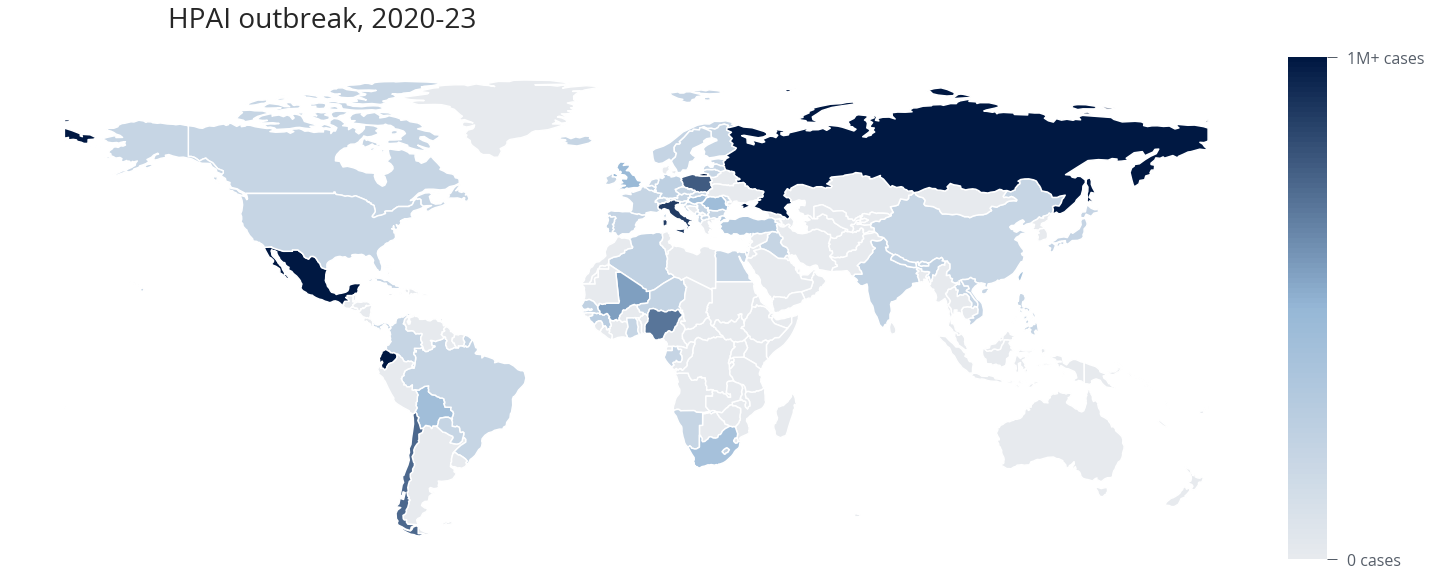

In [240]:
# Create a new figure and axes
fig, ax = plt.subplots(figsize=(24, 18))

vmin=-250000
vmax=1000000

# Plot the map
merge2020.plot(column='animalCases',
           cmap=cm,
           legend=False,
           ax=ax, vmin=vmin,vmax=vmax)

# Adjust margins and set title
ax.margins(x=0.05) 

ttl = ax.set_title('HPAI outbreak, 2020-23',fontsize=28)
ttl.set_position([0.25,1.05])


# Set the background color of the map
ax.set(facecolor='white')

# Turn axis off
ax.axis('off')

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
sm = plt.cm.ScalarMappable(cmap=cm,
                           norm=plt.Normalize(vmin=vmin,
                                              vmax=vmax))


sm._A = []
cbar = plt.colorbar(sm,cax=cax,drawedges=False)
cbar.set_ticks([vmin,vmax])
cbar.ax.yaxis.set_ticklabels(["0 cases","1M+ cases"])
cbar.ax.yaxis.set_tick_params(direction='out',length=10,width=1,pad=10,colors=chart[1],labelsize=16)
cbar.outline.set_visible(False)

# # # # # Display the map
# plt.tight_layout()
# plt.show()

# # # Save
plt.savefig('figures/h5n1_animal_outbreak_2020-23.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

In [2]:
import pandas as pd

In [5]:
virion = pd.read_csv('data/Virion.csv',sep='\t',header=0)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 180007: invalid continuation byte